In [1]:
#Examining Logistic Regression Errors with a confusion matrix

Bootstrap estimated coefficients (first few samples):
[[ 9.24178966e-03  4.53087789e-03 -4.35018696e-03 -1.50883938e-03
   7.20944983e-05  1.86712025e-02  2.01926397e-01  8.62060590e-03]
 [ 2.53735480e-02  5.83547238e-03 -4.38850484e-03 -3.67607673e-04
   4.06441722e-04  1.26336242e-02  1.42882146e-01  2.22577164e-03]
 [ 3.72507180e-03  3.70135981e-03 -2.91094675e-03 -7.68695561e-04
   1.17280437e-05  2.26776191e-02  2.20068082e-01  7.58499942e-03]
 [ 2.33690863e-02  5.93691835e-03 -2.27939853e-03  1.52371005e-03
   2.17181036e-04  1.71501542e-02  1.12394539e-01  5.04372542e-05]
 [ 2.22002783e-02  5.82246837e-03 -2.37708938e-03 -1.43255855e-03
   3.57363286e-04  1.25574631e-02  1.15075905e-01  2.88694179e-03]
 [ 1.70664867e-02  4.22076695e-03 -2.52580517e-03 -5.27445903e-04
   5.02656152e-04  1.73854870e-02  1.93692514e-01  3.45403040e-03]
 [ 1.24254216e-02  6.45984661e-03 -1.03878646e-03 -2.69091279e-05
   1.22588759e-04  7.19960871e-03  1.51271816e-01  2.35494888e-03]
 [ 1.16268933e-

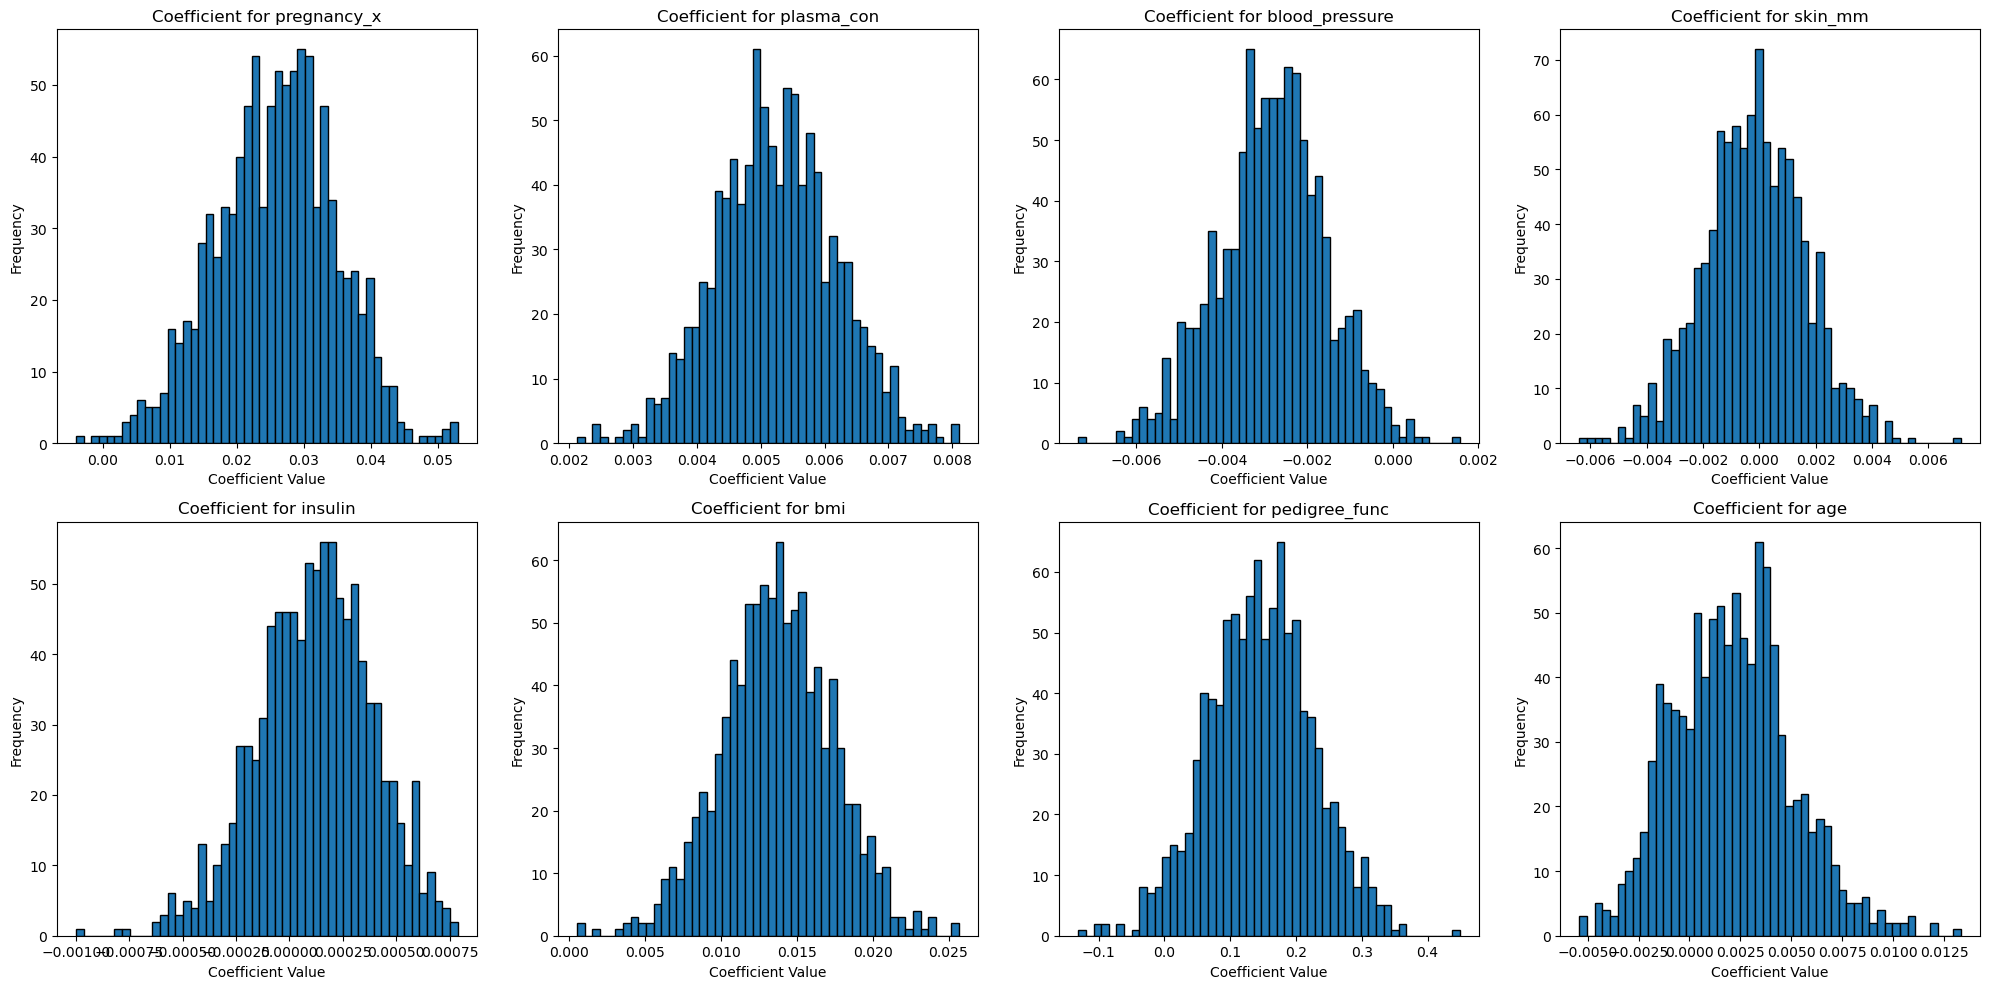

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Load the dataset from an alternative URL
data_web_address = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancy_x', 'plasma_con', 'blood_pressure', 'skin_mm', 'insulin', 'bmi', 'pedigree_func', 'age', 'target']
feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address, names=column_names)

# Split the data into features and target
X = all_data[feature_names]
y = all_data['target']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Initialize the Ridge model
r = Ridge()

# Bootstrap resampling
n_bootstraps = 1000
len_data = len(X_train)
subsample_size = int(0.5 * len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size, replace=True)

# Pre-allocate space for the coefficients
coefs_r = np.ones((n_bootstraps, X_train.shape[1]))

# Perform bootstrap resampling
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = X_train.iloc[subsample_idx]
    subsample_y = y_train.iloc[subsample_idx]
    r.fit(subsample_X, subsample_y)
    coefs_r[i, :] = r.coef_

# Display the results
print(f'Bootstrap estimated coefficients (first few samples):\n{coefs_r[:10, :]}')

# Plot histogram of bootstrap coefficients for each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for j, ax in enumerate(axes.ravel()):
    ax.hist(coefs_r[:, j], bins=50, edgecolor='k')
    ax.set_title(f'Coefficient for {feature_names[j]}')
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Accuracy: 0.7857142857142857
Confusion Matrix:
[[88 12]
 [21 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



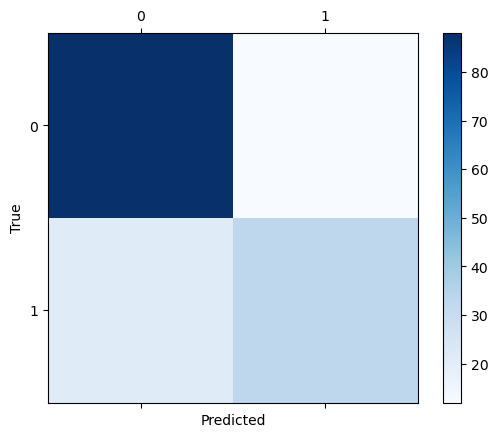

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset from an alternative URL
data_web_address = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancy_x', 'plasma_con', 'blood_pressure', 'skin_mm', 'insulin', 'bmi', 'pedigree_func', 'age', 'target']
feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address, names=column_names)

# Split the data into features and target
X = all_data[feature_names]
y = all_data['target']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred,labels = [1,0])

array([[33, 21],
       [12, 88]])